In [117]:
#!pip install yfinance

## Question 1 (a)

In [118]:
# import yahoo finance
#import yfinance as yf

# import numpy and pandas
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
from copy import deepcopy
np.random.seed(12345)

# used for dates
import datetime as dt
from datetime import datetime, date


# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# import stats
from __future__ import division
import statsmodels.api as sm 
from math import sqrt, exp

In [119]:
#from pandas_datareader.data import DataReader

#def get_data_for_multiple_cryptos(symbols, start_date, end_date):

#    cryptos = dict()
    # loop through all the symbols
#    for symbol in symbols: 
#        format='%Y-%m-%d'
#        s = yf.download(symbol, dt.datetime.strptime(start_date, format), dt.datetime.strptime(end_date, format))
        # calculate log returns
      
#        s.insert(0, "Symbol", symbol)  #insert ticker column so you can reference better later
        
#        s['Prev Close'] = s['Adj Close'].shift(1)
#        s['log_return'] = np.log(s['Adj Close']/s['Prev Close'])
#        s['perc_return'] = (s['Adj Close']/s['Prev Close']) - 1
        # add it to the dictionary
#        cryptos[symbol] = s
    # return the dictionary
#    return cryptos

In [120]:
#symbols = ["BTC-USD", "ETH-USD", "DOGE-USD", "MATIC-USD"]
#cryptos = get_data_for_multiple_cryptos(symbols, start_date='2019-07-17',end_date= '2022-02-02')
#cryptos['BTC-USD'].dropna(inplace = True)
#cryptos['ETH-USD'].dropna(inplace = True)
#cryptos['DOGE-USD'].dropna(inplace = True)
#cryptos['MATIC-USD'].dropna(inplace = True)
#2020-02-01
#BTC = cryptos['BTC-USD']
#ETH = cryptos['ETH-USD']
#DOGE = cryptos['DOGE-USD']
#ATIC = cryptos['MATIC-USD']

In [121]:
#for k,v in cryptos.items():
#    df = pd.DataFrame(v)
#    df.to_csv(k+'.csv',index = True)

In [122]:
BTC=pd.read_csv("BTC-USD.csv")
DOGE=pd.read_csv("DOGE-USD.csv")
ETH=pd.read_csv("ETH-USD.csv")
MATIC=pd.read_csv("MATIC-USD.csv")
BTC_adjusted = BTC[17:]
ETH_adjusted = ETH[17:]
DOGE_adjusted = DOGE[17:]
MATIC_adjusted = MATIC[17:]


DOGE_1 =DOGE.iloc[199:,]
ETH_1 =ETH.iloc[199:,]
BTC_1 = BTC.iloc[199:,]
MATIC_1 = MATIC.iloc[199:,]
log_returns2 = pd.DataFrame({'Date':BTC_1['Date'],
                            'BTC-USD':BTC_1['log_return'],
                            'ETH-USD':ETH_1['log_return'],
                            'DOGE-USD':DOGE_1['log_return'],
                            'MATIC-USD':MATIC_1['log_return'],
                            })
log_returns2=log_returns2.reset_index(drop=True)
log_returns2 = log_returns2.set_index('Date')
log_returns2

,BTC-USD,ETH-USD,DOGE-USD,MATIC-USD
Date,,,,
2020-02-01,0.004518,0.019316,0.011628,0.022230
2020-02-02,-0.005178,0.026559,0.018814,0.041880
2020-02-03,-0.005456,0.006592,-0.011410,0.144471
2020-02-04,-0.012185,-0.003242,0.025492,-0.044297
2020-02-05,0.046028,0.076176,0.031074,0.014285
...,...,...,...,...
2022-01-28,0.017248,0.049945,0.002891,0.053536
2022-01-29,0.009321,0.019437,0.009835,0.009334
2022-01-30,-0.005800,0.002454,-0.025380,-0.054332


## Question 1(b)

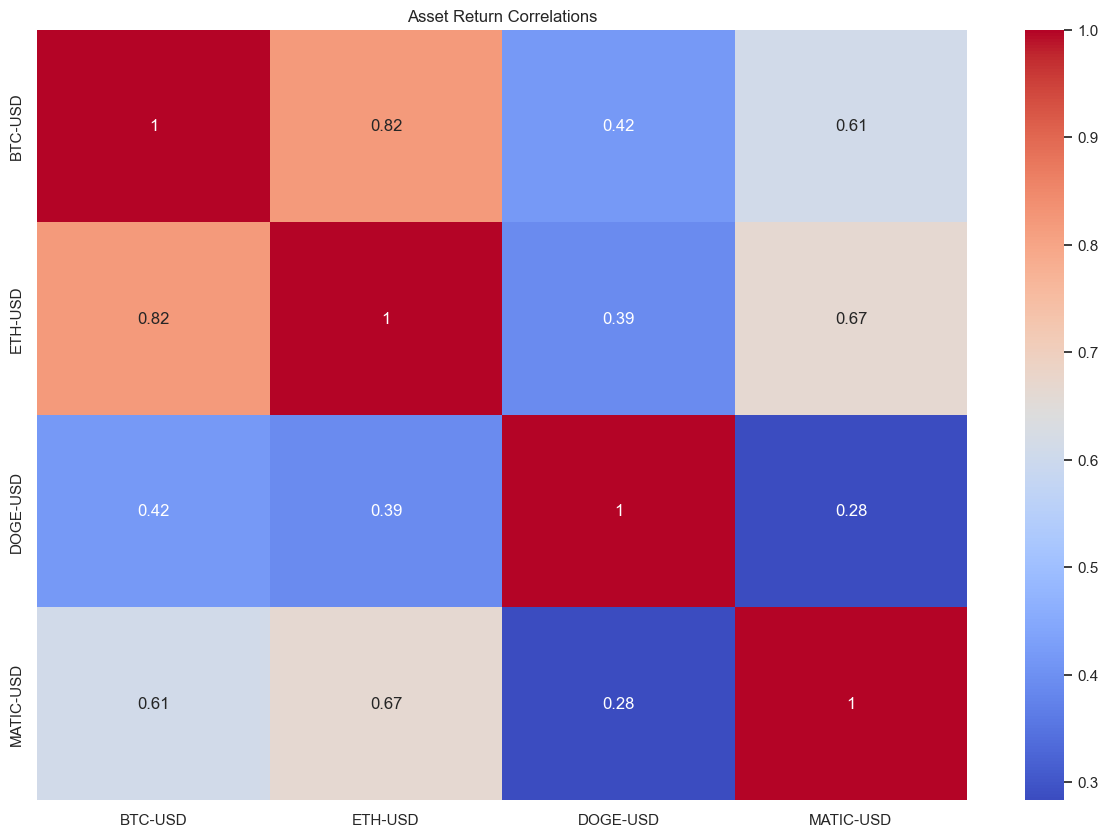

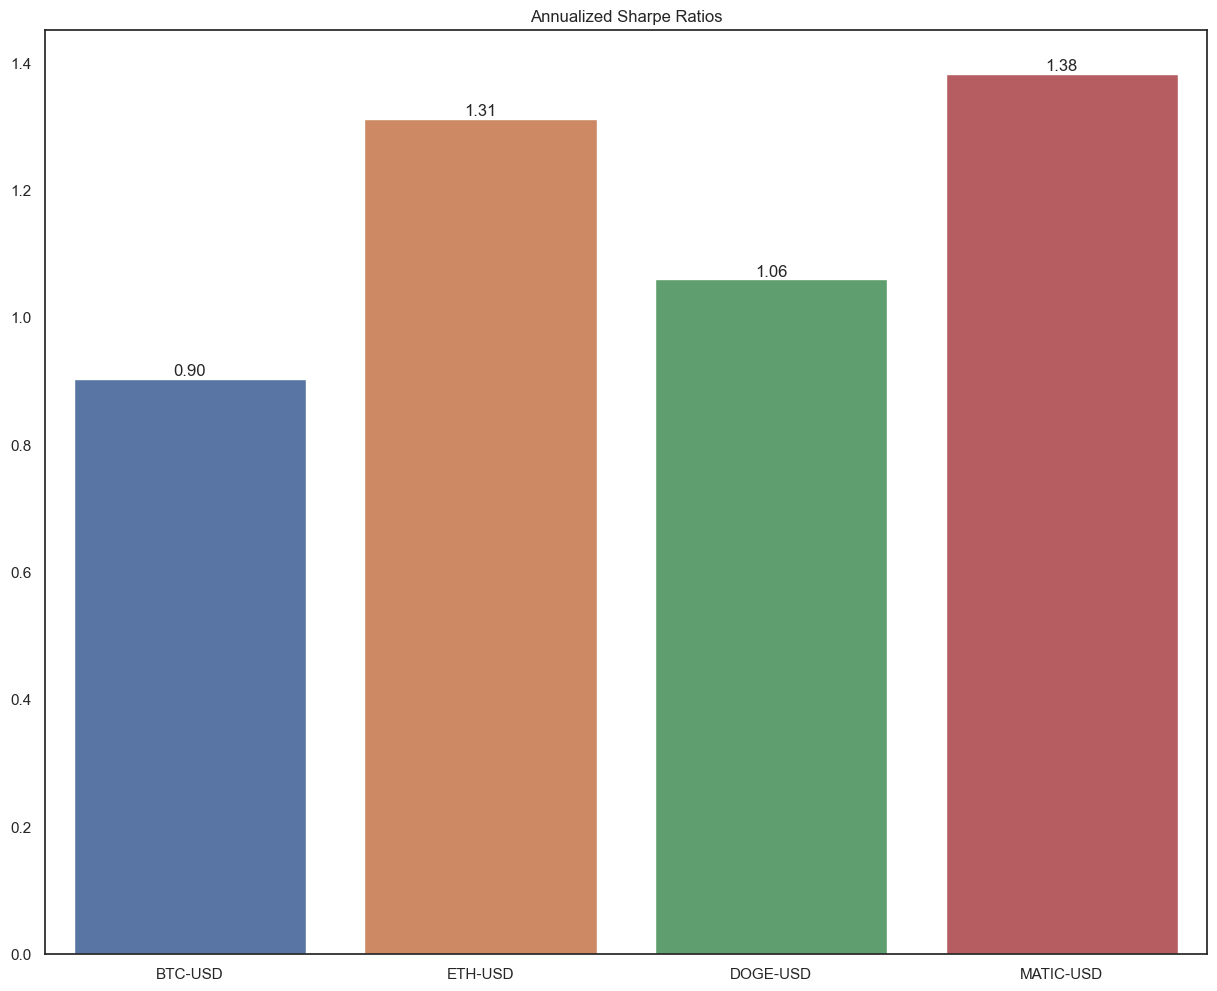

In [123]:
corr_df = log_returns2.corr()

# Plot the correlation matrix heatmap
sns.set(style="white")
plt.figure(figsize=(15, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Asset Return Correlations')
plt.show()

# Calculate the annualized Sharpe ratios of returns
sharpe_df = log_returns2.mean() / log_returns2.std() * np.sqrt(365)

# Plot the Sharpe ratios as a bar chart
fig, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=sharpe_df.index, y=sharpe_df.values)
plt.title('Annualized Sharpe Ratios')
ax.bar_label(ax.containers[-1], fmt='%.2f', label_type='edge')

plt.show()

## Question 1(c)

From the correlation matrix, it can be observed that most of the cryptocurrencies have a higher correlation with BTC as compared to the others, which is expected since BTC has the highest market capitalisation in the crypto market. As for the Sharpe Ratios, it seems that MATIC has the highest potential return given the same level of risk out of all the cryptocurrencies, followed by ETH. This could be explained by their smaller market capitalisation as compared to BTC and better fundamentals compared to DOGE, resulting in a higher potential for large growth.

## Question 2(a)

In [124]:
import cvxpy as cvx

#tickers = ["BTC-USD", "ETH-USD", "DOGE-USD", "MATIC-USD"]

#BTC_full =  get_data_for_multiple_cryptos(tickers,start_date='2019-07-17',end_date= '2022-02-02')['BTC-USD']
#BTC_full.dropna(inplace = True)
#BTC_full_daily_log_return = BTC_full['log_return']
#BTC_full_daily_log_return

#ETH_full =  get_data_for_multiple_cryptos(tickers,start_date='2019-07-17',end_date= '2022-02-02')['ETH-USD']
#ETH_full.dropna(inplace = True)
#ETH_full_daily_log_return = ETH_full['log_return']
#ETH_full_daily_log_return

#DOGE_full =  get_data_for_multiple_cryptos(tickers,start_date='2019-07-17',end_date= '2022-02-02')['DOGE-USD']
#DOGE_full.dropna(inplace = True)
#DOGE_full_daily_log_return = DOGE_full['log_return']
#DOGE_full_daily_log_return

#MATIC_full =  get_data_for_multiple_cryptos(tickers,start_date='2019-07-17',end_date= '2022-02-02')['MATIC-USD']
#MATIC_full.dropna(inplace = True)
#MATIC_full_daily_log_return = MATIC_full['log_return']
#MATIC_full_daily_log_return


#full_returns_df = pd.DataFrame({'BTC_returns': BTC_full_daily_log_return, 'ETH_returns': ETH_full_daily_log_return, 'DOGE_returns': DOGE_full_daily_log_return,
#                           'MATIC_returns': MATIC_full_daily_log_return})

#full_returns_df.dropna(inplace = True)

In [125]:
full_returns_df = pd.DataFrame({'Date':BTC_adjusted['Date'],'BTC_returns': BTC_adjusted['log_return'], 'ETH_returns': ETH_adjusted['log_return'], 'DOGE_returns': DOGE_adjusted['log_return'],
                           'MATIC_returns': MATIC_adjusted['log_return']})

full_returns_df = full_returns_df.set_index("Date")
full_returns_df.dropna(inplace = True)
full_returns_df

,BTC_returns,ETH_returns,DOGE_returns,MATIC_returns
Date,,,,
2019-08-03,0.028451,0.020978,0.001031,-0.034217
2019-08-04,0.013625,0.000806,0.008889,-0.039801
2019-08-05,0.073397,0.050550,0.049471,0.138279
2019-08-06,-0.028132,-0.035613,-0.045395,0.264196
2019-08-07,0.039612,0.001637,0.018805,0.080468
...,...,...,...,...
2022-01-28,0.017248,0.049945,0.002891,0.053536
2022-01-29,0.009321,0.019437,0.009835,0.009334
2022-01-30,-0.005800,0.002454,-0.025380,-0.054332


# Obtaining weights for restricted portfolio

In [126]:
def get_optimized_portfolio(returns_df, returns_scale = .0001, max_holding = 0.5):
    """
    Function that takes in the returns series of assets, minimizes the utility function, 
    and returns the portfolio weights
    
    Parameters
    ----------
    returns_df : pd.dataframe
        Dataframe containing log asset return series in each column
    
    returns_scale : float
        The scaling factor applied to the returns
        
    max_holding : float
        The maximum weight a stock can hold.
        
    Returns
    -------
    x : np.ndarray
        A numpy ndarray containing the weights of the assets in the optimized portfolio
    """
    
    # convert returns dataframe to numpy array
    returns = returns_df.T.to_numpy()
    # m is the number of assets
    m = returns.shape[0]
  
    # covariance matrix of returns
    cov = np.cov(returns)
    
    # creating variable of weights to optimize
    x = cvx.Variable(m)
    
    # portfolio variance, in quadratic form
    portfolio_variance = cvx.quad_form(x, cov)
#     print("return in simple returns")
#     print(returns_df)
    log_returns_df = np.log(returns_df+1)
#     print("return in log returns")
#     print(log_returns_df)
    total_return_log = log_returns_df.sum().to_numpy() #this is in log space, change to simple return
#     print("total return in log")
#     print(total_return_log)
#     print("total simple return")

    total_simple_return = np.exp(total_return_log) -1
#     print(total_simple_return)
    frequency = 252 #assume daily compounding, we are going to take geometric average
    #this is the standard basic mean for optimization (to assume daily compounding)
    
    horizon_length = returns.shape[1]
    expected_mean = (1 + total_simple_return) ** (1 / horizon_length) - 1
#     print("geometric return")
#     print(expected_mean)
    #let's assume 
    # element wise multiplication, followed up by sum of weights
    portfolio_return = sum(cvx.multiply(expected_mean, x))
    
    # Objective Function
    # We want to minimize variance and maximize returns. We can also minimize the negative of returns.
    # Therefore, variance has to be a positive and returns have to be a negative.
    objective = cvx.Minimize(portfolio_variance - returns_scale * portfolio_return)
    
    # Constraints
    # long only, sum of weights equal to 1, no allocation to a single stock great than 50% of portfolio
    constraints = [x >= 0, sum(x) == 1, x <= max_holding]

    # use cvxpy to solve the objective
    problem = cvx.Problem(objective, constraints)
    # retrieve the weights of the optimized portfolio
    result = problem.solve()

    return x.value

#same code I just removed away all the comments


In [127]:
#Restricted Weights
#check weekly, monthly, quarterly and yearly rolling window to tabulate weights

n_days = 731
n_assets = 4

weights = np.zeros((n_days, n_assets))

for i in range(n_days):
    w = get_optimized_portfolio(pd.DataFrame(full_returns_df.iloc[i:i+183]), returns_scale = 0, max_holding=0.5)
    weights[i] = w

  
BTC_weights = []
ETH_weights = []
DOGE_weights = []
MATIC_weights = []

for i in range (len(weights)):
    BTC_weights.append(weights[i][0])
    ETH_weights.append(weights[i][1])
    DOGE_weights.append(weights[i][2])
    MATIC_weights.append(weights[i][3])

BTC_weights_series = pd.Series(BTC_weights)
ETH_weights_series = pd.Series(ETH_weights)
DOGE_weights_series = pd.Series(DOGE_weights)
MATIC_weights_series = pd.Series(MATIC_weights)
    
weights_df = pd.DataFrame({"BTC_weights" :BTC_weights_series, "ETH_weights" :ETH_weights_series,
             "DOGE_weights" :DOGE_weights_series, "MATIC_weights": MATIC_weights_series})

date_range = pd.date_range(start='2020-02-02', end='2022-02-01', freq='D')
weights_df['Date'] = date_range

weights_df


,BTC_weights,ETH_weights,DOGE_weights,MATIC_weights,Date
0,0.490381,-4.176352e-21,0.500000,9.618965e-03,2020-02-02
1,0.491390,-4.202967e-21,0.500000,8.609934e-03,2020-02-03
2,0.491215,-4.087105e-21,0.500000,8.785292e-03,2020-02-04
3,0.488193,-4.042386e-21,0.500000,1.180740e-02,2020-02-05
4,0.494480,-4.672051e-21,0.500000,5.520392e-03,2020-02-06
...,...,...,...,...,...
726,0.500000,4.098115e-01,0.090189,-3.175085e-20,2022-01-28
727,0.500000,4.067887e-01,0.093211,-3.183587e-20,2022-01-29
728,0.500000,4.086032e-01,0.091397,-3.212096e-20,2022-01-30
729,0.500000,4.094510e-01,0.090549,-3.163927e-20,2022-01-31


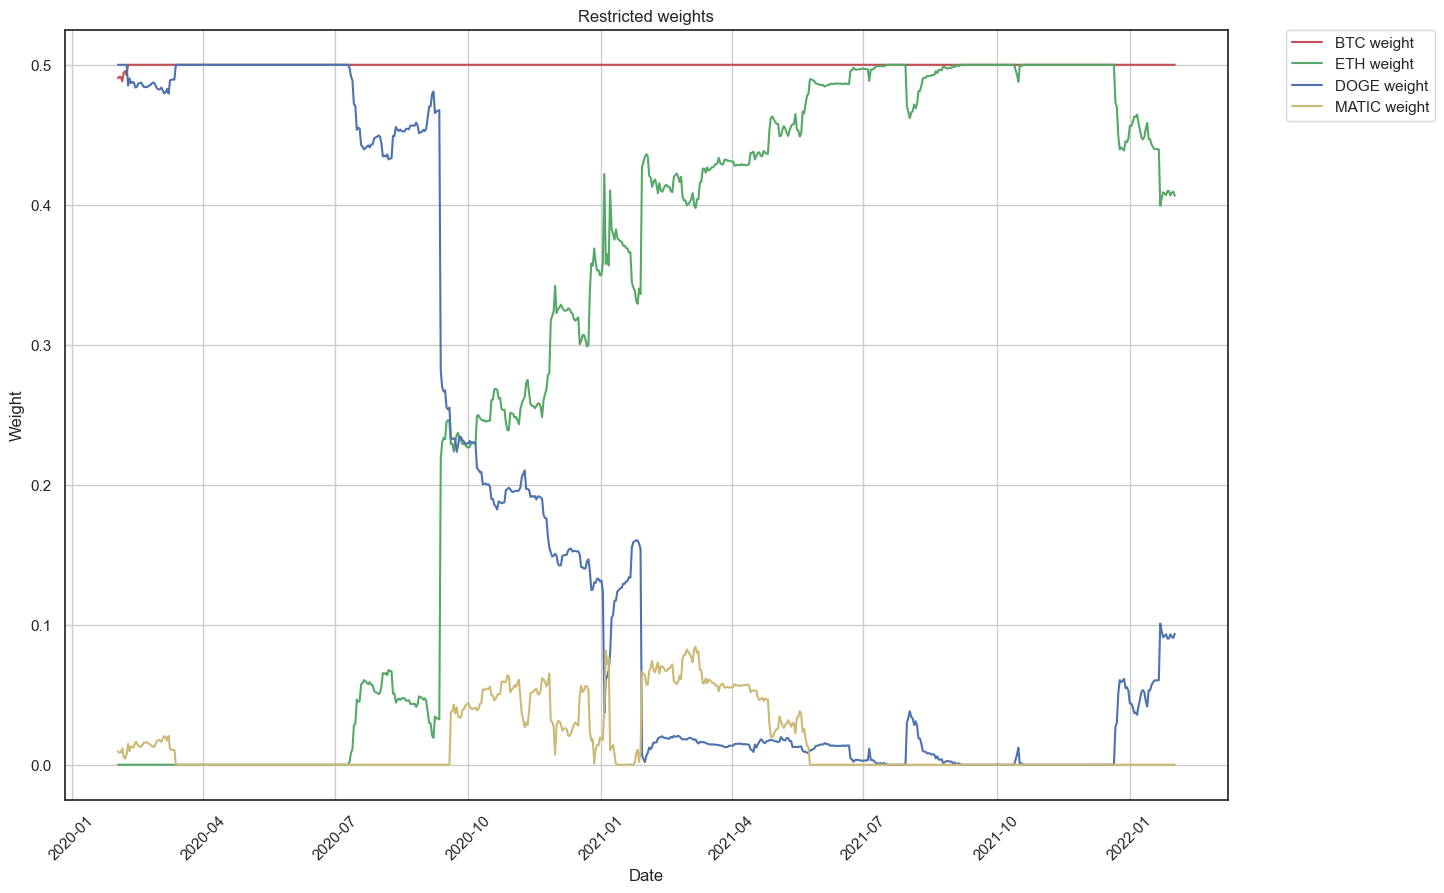

In [128]:
plt.figure(figsize=(15,10))
plt.plot(weights_df['Date'], weights_df['BTC_weights'], 'r', label='BTC weight')
plt.plot(weights_df['Date'], weights_df['ETH_weights'], 'g', label='ETH weight')
plt.plot(weights_df['Date'], weights_df['DOGE_weights'], 'b', label='DOGE weight')
plt.plot(weights_df['Date'], weights_df['MATIC_weights'], 'y', label='MATIC weight')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Restricted weights')
plt.show()


# Obtaining weights for unrestricted portfolio

In [129]:
weights_unrestricted = np.zeros((n_days, n_assets))

for i in range(n_days):
    w = get_optimized_portfolio(pd.DataFrame(full_returns_df.iloc[i:i+183]), returns_scale = 0, max_holding=1)
    weights_unrestricted[i] = w

In [130]:
BTC_weights_unrestricted = []
ETH_weights_unrestricted = []
DOGE_weights_unrestricted = []
MATIC_weights_unrestricted = []

for i in range (len(weights_unrestricted)):
    BTC_weights_unrestricted.append(weights_unrestricted[i][0])
    ETH_weights_unrestricted.append(weights_unrestricted[i][1])
    DOGE_weights_unrestricted.append(weights_unrestricted[i][2])
    MATIC_weights_unrestricted.append(weights_unrestricted[i][3])

BTC_weights_unrestricted_series = pd.Series(BTC_weights_unrestricted)
ETH_weights_unrestricted_series = pd.Series(ETH_weights_unrestricted)
DOGE_weights_unrestricted_series = pd.Series(DOGE_weights_unrestricted)
MATIC_weights_unrestricted_series = pd.Series(MATIC_weights_unrestricted)
    
weights_df_unrestricted = pd.DataFrame({"BTC_weights_unrestricted" :BTC_weights_unrestricted_series, 
                                        "ETH_weights_unrestricted" :ETH_weights_unrestricted_series,
                                        "DOGE_weights_unrestricted" :DOGE_weights_unrestricted_series,
                                        "MATIC_weights_unrestricted": MATIC_weights_unrestricted_series})



date_range = pd.date_range(start='2020-02-02', end='2022-02-01', freq='D')
weights_df_unrestricted['Date'] = date_range



In [131]:
# checking
weights_df_unrestricted.columns

weights_df_unrestricted[['BTC_weights_unrestricted', 'ETH_weights_unrestricted',
                       'DOGE_weights_unrestricted', 'MATIC_weights_unrestricted']].sum(axis=1)

temp = weights_df_unrestricted[['BTC_weights_unrestricted', 'ETH_weights_unrestricted',
                       'DOGE_weights_unrestricted', 'MATIC_weights_unrestricted']].sum(axis=1)

temp

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
726    1.0
727    1.0
728    1.0
729    1.0
730    1.0
Length: 731, dtype: float64

In [132]:
weights_df_unrestricted

,BTC_weights_unrestricted,ETH_weights_unrestricted,DOGE_weights_unrestricted,MATIC_weights_unrestricted,Date
0,0.414834,1.020014e-19,5.758800e-01,9.286198e-03,2020-02-02
1,0.421321,9.089757e-20,5.703382e-01,8.340689e-03,2020-02-03
2,0.421960,9.012605e-20,5.694590e-01,8.580634e-03,2020-02-04
3,0.436390,6.754175e-20,5.519583e-01,1.165208e-02,2020-02-05
4,0.431457,8.107749e-20,5.635065e-01,5.037032e-03,2020-02-06
...,...,...,...,...,...
726,1.000001,-1.370089e-06,-8.904602e-09,2.241670e-07,2022-01-28
727,0.999993,-5.006147e-06,-7.546416e-06,1.949694e-05,2022-01-29
728,0.999999,-1.080522e-06,-1.481741e-06,3.870332e-06,2022-01-30
729,0.999993,-5.141382e-06,-7.529289e-06,1.969795e-05,2022-01-31


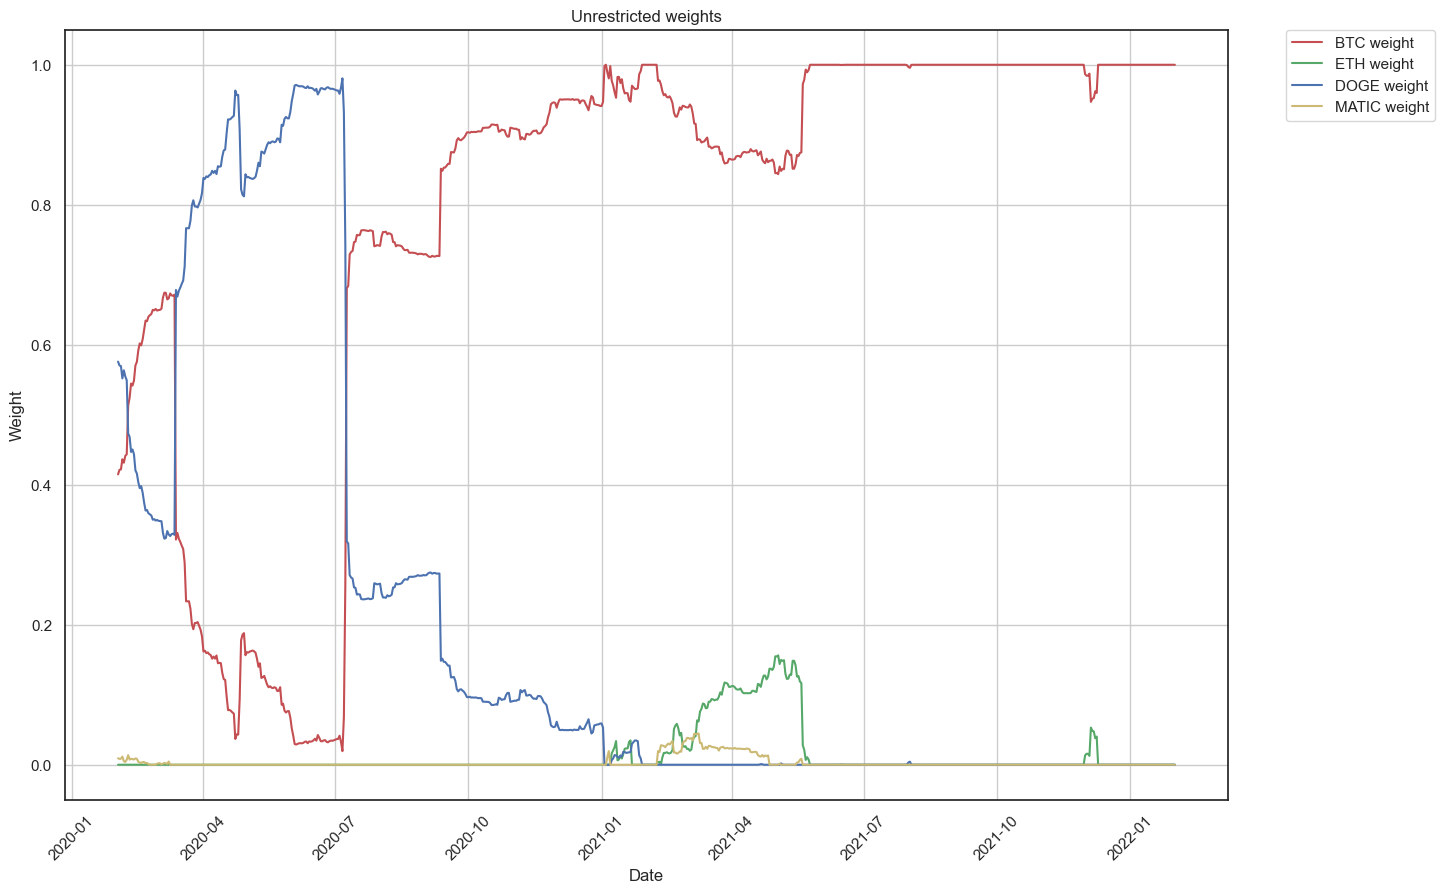

In [133]:
plt.figure(figsize=(15,10))
plt.plot(weights_df_unrestricted['Date'], weights_df_unrestricted['BTC_weights_unrestricted'], 'r', label='BTC weight')
plt.plot(weights_df_unrestricted['Date'], weights_df_unrestricted['ETH_weights_unrestricted'], 'g', label='ETH weight')
plt.plot(weights_df_unrestricted['Date'], weights_df_unrestricted['DOGE_weights_unrestricted'], 'b', label='DOGE weight')
plt.plot(weights_df_unrestricted['Date'], weights_df_unrestricted['MATIC_weights_unrestricted'], 'y', label='MATIC weight')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Unrestricted weights')
plt.show()


In [134]:
BTC = BTC_1.set_index("Date")
ETH = ETH_1.set_index("Date")
DOGE = DOGE_1.set_index("Date")
MATIC = MATIC_1.set_index("Date")

## Question 2(b)

# Portfolio returns of restricted weights

In [135]:
#suppose i start with 1million USD
portfolio_value = 1000000 # initial value of 1million USD on 1 Feb 2020 First row of portfolio df is 2 feb 2020
portfolio_values = []

for i in range(len(weights)):
    #for the day
    BTC_weight = weights[i][0]
    ETH_weight = weights[i][1]
    DOGE_weight = weights[i][2]
    MATIC_weight = weights[i][3]
    
    money_for_BTC = BTC_weight * portfolio_value
    money_for_ETH = ETH_weight * portfolio_value
    money_for_DOGE = DOGE_weight * portfolio_value
    money_for_MATIC = MATIC_weight * portfolio_value

    amount_of_BTC = money_for_BTC / BTC["Prev Close"][i]
    amount_of_ETH = money_for_ETH / ETH["Prev Close"][i]
    amount_of_DOGE = money_for_DOGE / DOGE["Prev Close"][i]
    amount_of_MATIC = money_for_MATIC / MATIC["Prev Close"][i]
    BTC_price = BTC["Adj Close"][i]
    ETH_price = ETH["Adj Close"][i]
    DOGE_price = DOGE["Adj Close"][i]
    MATIC_price = MATIC["Adj Close"][i]
    portfolio_value = amount_of_BTC * BTC_price + amount_of_ETH * ETH_price + amount_of_DOGE * DOGE_price +amount_of_MATIC * MATIC_price
    portfolio_values.append(portfolio_value)

portfolio_df = pd.DataFrame({"Portfolio_value" : portfolio_values})

portfolio_df
portfolio_df['Prev value'] = portfolio_df['Portfolio_value'].shift(1)
portfolio_df['log_return'] = np.log(portfolio_df['Portfolio_value']/portfolio_df['Prev value'])
portfolio_df['perc_return'] = (portfolio_df['Portfolio_value']/portfolio_df['Prev value']) - 1
portfolio_df_restricted = portfolio_df.copy()
portfolio_df

,Portfolio_value,Prev value,log_return,perc_return
0,1.008285e+06,NaN,NaN,NaN
1,1.015672e+06,1.008285e+06,0.007300,0.007327
2,1.008583e+06,1.015672e+06,-0.007004,-0.006980
3,1.015124e+06,1.008583e+06,0.006465,0.006485
4,1.054869e+06,1.015124e+06,0.038406,0.039153
...,...,...,...,...
726,7.694136e+06,7.734273e+06,-0.005203,-0.005189
727,7.923434e+06,7.694136e+06,0.029366,0.029802
728,8.031237e+06,7.923434e+06,0.013514,0.013606
729,7.997868e+06,8.031237e+06,-0.004164,-0.004155


# Portfolio returns of unrestricted weights

In [136]:
portfolio_values_unrestricted = []

BTC_table = []
ETH_table = []
DOGE_table = []
MATIC_table = []
portfolio_value = 1000000 # initial value of 1million USD on 1 Feb 2020 First row of portfolio df is 2 feb 2020


for i in range(len(weights_unrestricted)):
    #for the day
    BTC_weight = weights_unrestricted[i][0]
    ETH_weight = weights_unrestricted[i][1]
    DOGE_weight = weights_unrestricted[i][2]
    MATIC_weight = weights_unrestricted[i][3]
    
    
    money_for_BTC = BTC_weight * portfolio_value
    money_for_ETH = ETH_weight * portfolio_value
    money_for_DOGE = DOGE_weight * portfolio_value
    money_for_MATIC = MATIC_weight * portfolio_value
    
    
    amount_of_BTC = money_for_BTC / BTC["Prev Close"][i + 1]
    amount_of_ETH = money_for_ETH / ETH["Prev Close"][i + 1]
    amount_of_DOGE = money_for_DOGE / DOGE["Prev Close"][i + 1]
    amount_of_MATIC = money_for_MATIC / MATIC["Prev Close"][i + 1]
    
    
    BTC_price = BTC["Adj Close"][i + 1]
    ETH_price = ETH["Adj Close"][i + 1]
    DOGE_price = DOGE["Adj Close"][i + 1]
    MATIC_price = MATIC["Adj Close"][i + 1]
    
    
    BTC_table.append(["BTC",amount_of_BTC, BTC_price, money_for_BTC])
    ETH_table.append(["ETH",amount_of_ETH, ETH_price, money_for_ETH])
    DOGE_table.append(["DOGE",amount_of_DOGE, DOGE_price, money_for_DOGE])
    MATIC_table.append(["MATIC",amount_of_MATIC, MATIC_price, money_for_MATIC])
    portfolio_value = amount_of_BTC * BTC_price + amount_of_ETH * ETH_price + amount_of_DOGE * DOGE_price +amount_of_MATIC * MATIC_price
    portfolio_values_unrestricted.append(portfolio_value)


portfolio_df_unrestricted = pd.DataFrame({"Portfolio_value" : portfolio_values_unrestricted})



portfolio_df_unrestricted['Prev value'] = portfolio_df_unrestricted['Portfolio_value'].shift(1)
portfolio_df_unrestricted['log_return'] = np.log(portfolio_df_unrestricted['Portfolio_value']/portfolio_df_unrestricted['Prev value'])
portfolio_df_unrestricted['perc_return'] = (portfolio_df_unrestricted['Portfolio_value']/portfolio_df_unrestricted['Prev value']) - 1
portfolio_df_unrestricted


,Portfolio_value,Prev value,log_return,perc_return
0,1.009192e+06,NaN,NaN,NaN
1,1.001657e+06,1.009192e+06,-0.007495,-0.007467
2,1.010893e+06,1.001657e+06,0.009179,0.009221
3,1.049453e+06,1.010893e+06,0.037435,0.038144
4,1.071942e+06,1.049453e+06,0.021203,0.021430
...,...,...,...,...
726,7.096607e+06,6.975258e+06,0.017247,0.017397
727,7.163066e+06,7.096607e+06,0.009321,0.009365
728,7.121636e+06,7.163066e+06,-0.005801,-0.005784
729,7.227853e+06,7.121636e+06,0.014804,0.014915


In [137]:
date_range = pd.date_range(start='2020-02-02', end='2022-02-01', freq='D')

BTC_table = pd.DataFrame(BTC_table, columns=['Security','notional', 'price_USD', 'market_value_USD'])
BTC_table['Date'] = date_range
BTC_table = BTC_table.set_index("Date")
BTC_table

,Security,notional,price_USD,market_value_USD
Date,,,,
2020-02-02,BTC,44.164727,9344.365234,4.148338e+05
2020-02-03,BTC,45.502711,9293.521484,4.251939e+05
2020-02-04,BTC,45.478932,9180.962891,4.226594e+05
2020-02-05,BTC,48.049771,9613.423828,4.411432e+05
2020-02-06,BTC,47.100105,9729.801758,4.527933e+05
...,...,...,...,...
2022-01-28,BTC,187.818999,37784.332031,6.975266e+06
2022-01-29,BTC,187.817473,38138.179688,7.096558e+06
2022-01-30,BTC,187.818522,37917.601562,7.163057e+06


In [138]:
ETH_table = pd.DataFrame(ETH_table, columns=['Security','notional', 'price_USD', 'market_value_USD'])
ETH_table['Date'] = date_range
ETH_table = ETH_table.set_index("Date")
ETH_table

,Security,notional,price_USD,market_value_USD
Date,,,,
2020-02-02,ETH,5.553396e-16,188.617538,1.020014e-13
2020-02-03,ETH,4.863446e-16,189.865067,9.173312e-14
2020-02-04,ETH,4.754712e-16,189.250595,9.027538e-14
2020-02-05,ETH,3.607782e-16,204.230240,6.827749e-14
2020-02-06,ETH,4.166230e-16,212.339081,8.508701e-14
...,...,...,...,...
2022-01-28,ETH,-3.944169e-03,2547.092041,-9.556725e+00
2022-01-29,ETH,-1.394793e-02,2597.084717,-3.552666e+01
2022-01-30,ETH,-2.980207e-03,2603.466553,-7.739850e+00


In [139]:
DOGE_table = pd.DataFrame(DOGE_table, columns=['Security','notional', 'price_USD', 'market_value_USD'])
DOGE_table['Date'] = date_range
DOGE_table = DOGE_table.set_index("Date")
DOGE_table

,Security,notional,price_USD,market_value_USD
Date,,,,
2020-02-02,DOGE,2.377705e+08,0.002468,575880.042775
2020-02-03,DOGE,2.332175e+08,0.002440,575580.847940
2020-02-04,DOGE,2.337715e+08,0.002503,570402.545720
2020-02-05,DOGE,2.229208e+08,0.002582,557970.797666
2020-02-06,DOGE,2.290370e+08,0.002653,591373.472691
...,...,...,...,...
2022-01-28,DOGE,-4.397395e-01,0.141656,-0.062112
2022-01-29,DOGE,-3.780563e+02,0.143056,-53.553949
2022-01-30,DOGE,-7.419337e+01,0.139471,-10.613807


In [140]:
MATIC_table = pd.DataFrame(MATIC_table, columns=['Security','notional', 'price_USD', 'market_value_USD'])
MATIC_table['Date'] = date_range
MATIC_table = MATIC_table.set_index("Date")
MATIC_table

,Security,notional,price_USD,market_value_USD
Date,,,,
2020-02-02,MATIC,506584.370933,0.019115,9286.198398
2020-02-03,MATIC,440353.568127,0.022086,8417.358059
2020-02-04,MATIC,389153.772757,0.021129,8594.850252
2020-02-05,MATIC,557480.675795,0.021433,11779.008680
2020-02-06,MATIC,246635.006983,0.024459,5286.127987
...,...,...,...,...
2022-01-28,MATIC,0.982371,1.679217,1.563623
2022-01-29,MATIC,82.396816,1.694964,138.362133
2022-01-30,MATIC,16.356360,1.605330,27.723441


In [141]:
portfolio_df[1:]

round((np.exp(portfolio_df_unrestricted["log_return"].sum()/len(portfolio_df_unrestricted["log_return"]) * 365) -1),3)

1.682

In [142]:
annualised_returns = (1 + portfolio_df['perc_return'].mean()) * 365 - 1
annualised_volatility = portfolio_df['log_return'].std()* 365 ** 0.5 * 100
print("annualised % return of restricted portfolio is "  + str(annualised_returns))
print("annualised % volatility of restricted portfolio is "  + str(annualised_volatility))

annualised_returns_unrestricted = (1 + portfolio_df_unrestricted['perc_return'].mean()) * 365 - 1
annualised_volatility_unrestricted = portfolio_df_unrestricted['log_return'].std()* 365 ** 0.5 * 100

print("annualised % return of unrestricted portfolio is "  + str(annualised_returns_unrestricted ))
print("annualised % return of unrestricted portfolio is "  + str(annualised_volatility_unrestricted ))

annualised % return of restricted portfolio is 365.3894078834881
annualised % volatility of restricted portfolio is 83.20867907491973
annualised % return of unrestricted portfolio is 365.3200068122997
annualised % return of unrestricted portfolio is 81.54451184996842


In [143]:
portfolio_df_unrestricted

,Portfolio_value,Prev value,log_return,perc_return
0,1.009192e+06,NaN,NaN,NaN
1,1.001657e+06,1.009192e+06,-0.007495,-0.007467
2,1.010893e+06,1.001657e+06,0.009179,0.009221
3,1.049453e+06,1.010893e+06,0.037435,0.038144
4,1.071942e+06,1.049453e+06,0.021203,0.021430
...,...,...,...,...
726,7.096607e+06,6.975258e+06,0.017247,0.017397
727,7.163066e+06,7.096607e+06,0.009321,0.009365
728,7.121636e+06,7.163066e+06,-0.005801,-0.005784
729,7.227853e+06,7.121636e+06,0.014804,0.014915


In [144]:
portfolio_df_restricted

,Portfolio_value,Prev value,log_return,perc_return
0,1.008285e+06,NaN,NaN,NaN
1,1.015672e+06,1.008285e+06,0.007300,0.007327
2,1.008583e+06,1.015672e+06,-0.007004,-0.006980
3,1.015124e+06,1.008583e+06,0.006465,0.006485
4,1.054869e+06,1.015124e+06,0.038406,0.039153
...,...,...,...,...
726,7.694136e+06,7.734273e+06,-0.005203,-0.005189
727,7.923434e+06,7.694136e+06,0.029366,0.029802
728,8.031237e+06,7.923434e+06,0.013514,0.013606
729,7.997868e+06,8.031237e+06,-0.004164,-0.004155


In [145]:
temp = pd.concat([BTC_table,ETH_table,DOGE_table,MATIC_table]).reset_index()
temp.columns
temp_pivot = temp.pivot_table(index='Date',values='market_value_USD',aggfunc='sum')


annualised return of restricted and unrestricted portfolio is largely similar at 365%. Annualised volatility of restricted portfolio is unexpectedly higher at 83% compared to unrestricted portfolio at 81%. This could be explained due to the presence of other cryptocurrencies in the restricted portfolio whereas the restricted portfolio consists of BTC only in the long run.

## Question 3(a)

## Q3(a) 1 (HS attempt with T11 code)


In [146]:
##get prices for 1 year and calculate HS VaR
#def download_stock_prices(tickers, start = '2020-02-01', end = '2022-02-01'):
#    prices = {}
#    for ticker in tickers:
#        df = yf.download(ticker, start = start, end = end)
#        df['Log_Returns'] = np.log(df['Adj Close']/ df['Adj Close'].shift(1)) #“ln(St+1/St)”
#        prices[ticker] = df[['Adj Close', 'Log_Returns']]
#    return prices

#tickers = ['BTC-USD', 'ETH-USD', 'DOGE-USD','MATIC-USD']
#prices = download_stock_prices(tickers)

In [147]:
tickers = [BTC_1, ETH_1, DOGE_1,MATIC_1]
tick_n=['BTC-USD', 'ETH-USD', 'DOGE-USD','MATIC-USD']
i=0
prices= {}
for ticker in tickers:
    df2 = deepcopy(ticker)
    df2 = df2[['Date','Adj Close', 'log_return']]
    prices[tick_n[i]] = df2
    
    i+=1
    #df['Log_Returns'] = np.log(df['Adj Close']/ df['Adj Close'].shift(1)) #“ln(St+1/St)”
    #prices[ticker] = df[['Adj Close', 'Log_Returns']]


{'BTC-USD':            Date     Adj Close  log_return
 199  2020-02-01   9392.875000    0.004518
 200  2020-02-02   9344.365234   -0.005178
 201  2020-02-03   9293.521484   -0.005456
 202  2020-02-04   9180.962891   -0.012185
 203  2020-02-05   9613.423828    0.046028
 ..          ...           ...         ...
 926  2022-01-28  37784.332031    0.017248
 927  2022-01-29  38138.179688    0.009321
 928  2022-01-30  37917.601562   -0.005800
 929  2022-01-31  38483.125000    0.014804
 930  2022-02-01  38743.273438    0.006737
 
 [732 rows x 3 columns],
 'ETH-USD':            Date    Adj Close  log_return
 199  2020-02-01   183.673950    0.019316
 200  2020-02-02   188.617538    0.026559
 201  2020-02-03   189.865067    0.006592
 202  2020-02-04   189.250595   -0.003242
 203  2020-02-05   204.230240    0.076176
 ..          ...          ...         ...
 926  2022-01-28  2547.092041    0.049945
 927  2022-01-29  2597.084717    0.019437
 928  2022-01-30  2603.466553    0.002454
 929  2022-01-3

In [148]:
## 
##HS attempt with T11 code
##
def calc_historical_VaR(log_returns, alpha):
    log_var = log_returns.quantile(alpha)
    var = np.exp(log_var) - 1
    return -var

def calc_historical_ES(log_returns, alpha):
    log_var = log_returns.quantile(alpha)
    log_es = sum(log_returns[log_returns < log_var]) / (alpha * len(log_returns))
    percentage_es = np.exp(log_es) - 1
    return -percentage_es

In [149]:
###Note that weights here used weights_df_Unrestricted obtained in Q2
weights = deepcopy(weights_df_unrestricted)
tickers=['BTC-USD', 'ETH-USD', 'DOGE-USD','MATIC-USD']

weights.reset_index(drop=True, inplace=True)


[prices[ticker].reset_index(drop=True, inplace=True) for ticker in tickers]


stock_list = [prices[ticker]['Adj Close'].rename(ticker) for ticker in tickers]
portfolio_df = pd.concat(stock_list, axis = 1)
      
portfolio_df['Adj Close'] = sum([weights.iloc[:,[i][0]] *portfolio_df[tickers[i]] for i in range(len(tickers))])

portfolio_df['log_return'] = np.log(portfolio_df['Adj Close']/portfolio_df['Adj Close'].shift(1))
portfolio_df['Date'] = prices['BTC-USD']['Date']
#portfolio_df.head()
      
prices['PTF'] = portfolio_df

{'BTC-USD':            Date     Adj Close  log_return
 0    2020-02-01   9392.875000    0.004518
 1    2020-02-02   9344.365234   -0.005178
 2    2020-02-03   9293.521484   -0.005456
 3    2020-02-04   9180.962891   -0.012185
 4    2020-02-05   9613.423828    0.046028
 ..          ...           ...         ...
 727  2022-01-28  37784.332031    0.017248
 728  2022-01-29  38138.179688    0.009321
 729  2022-01-30  37917.601562   -0.005800
 730  2022-01-31  38483.125000    0.014804
 731  2022-02-01  38743.273438    0.006737
 
 [732 rows x 3 columns],
 'ETH-USD':            Date    Adj Close  log_return
 0    2020-02-01   183.673950    0.019316
 1    2020-02-02   188.617538    0.026559
 2    2020-02-03   189.865067    0.006592
 3    2020-02-04   189.250595   -0.003242
 4    2020-02-05   204.230240    0.076176
 ..          ...          ...         ...
 727  2022-01-28  2547.092041    0.049945
 728  2022-01-29  2597.084717    0.019437
 729  2022-01-30  2603.466553    0.002454
 730  2022-01-3

In [150]:
tickers = ['BTC-USD', 'ETH-USD', 'DOGE-USD','MATIC-USD','PTF']

for key in tickers:
    df = deepcopy(prices[key])
    #print(df)
    #df = df1.iloc[366-250:,]
    
    #rolling window set to semi-annual to standardise with Q2
    df.loc[:,'VaR'] = df['log_return'].rolling(183).apply(lambda x: calc_historical_VaR(x, 0.05))
    df.loc[:,'ES'] = df['log_return'].rolling(183).apply(lambda x: calc_historical_ES(x, 0.05))
    prices[key] = df


In [151]:
for asset in prices:
    prices[asset] = prices[asset][366:]


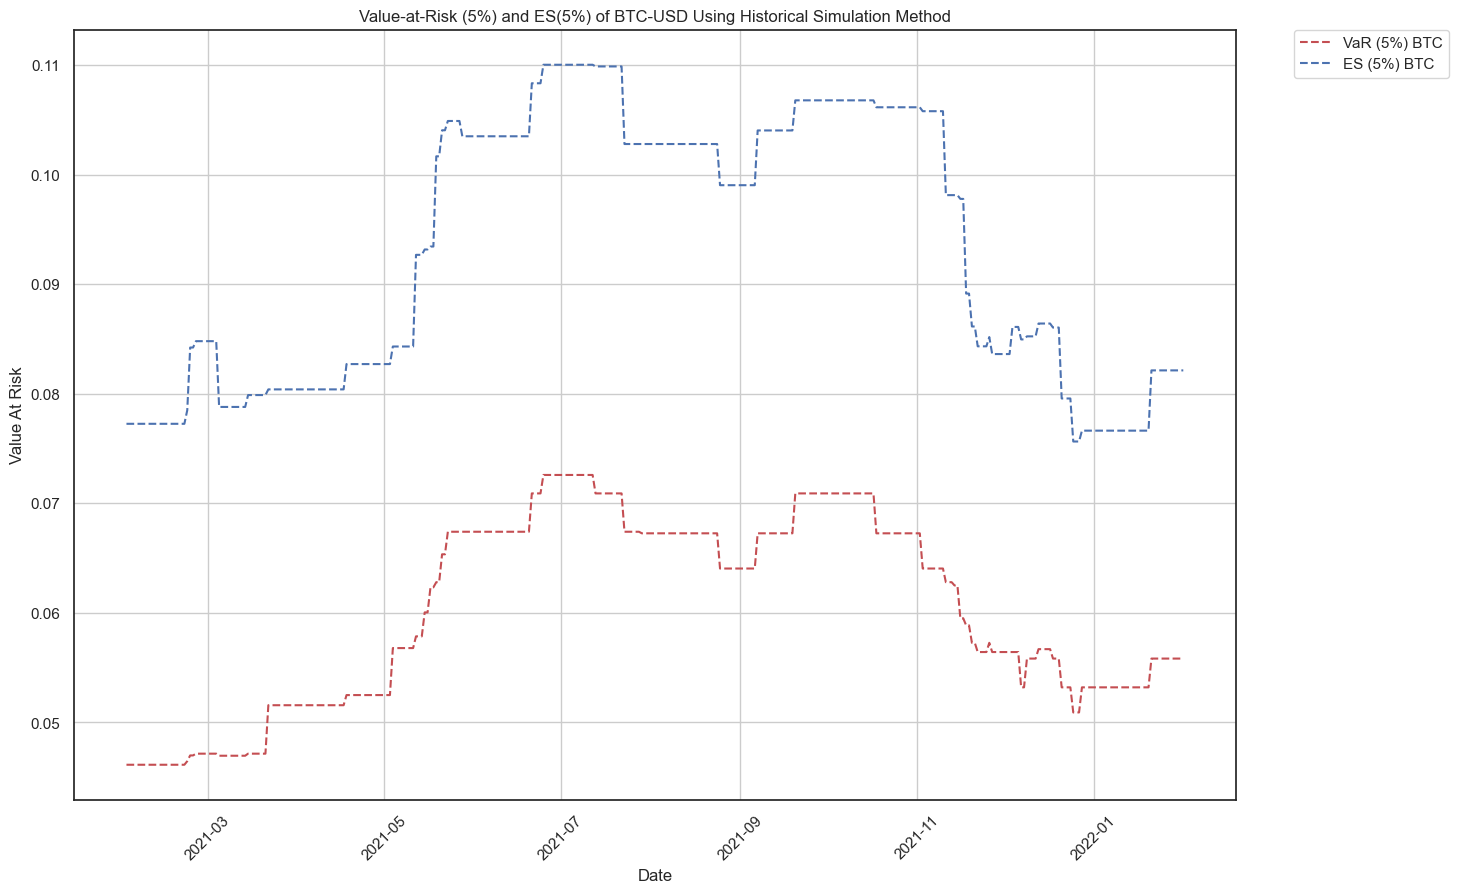

In [152]:
import matplotlib.ticker as ticker
# plot the VaR and ES curves for each asset and the portfolio



# for i in range(5):
#     axs[i].plot(prices[tickers[i]]['Date'], prices[tickers[i]]['VaR'], color = 'blue',label = 'VaR_95')
#     axs[i].plot(prices[tickers[i]]['Date'], prices[tickers[i]]['ES'],color = 'red', label = 'ES_95')
#     axs[i].set_title(tickers[i])
#     axs[i].legend()
#     plt.grid(True)
#     plt.xlabel('Date')
#     plt.ylabel('Value At Risk')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     locs, labels = plt.xticks()
#     plt.setp(labels, rotation=45)
#     plt.title('Value-at-Risk (5%) Using Historical Simulation Method')
#     plt.tight_layout()
#     plt.show()
# '''
# plt.figure(figsize=(15,10))
# for i in range(5):
#     plt.plot(prices[tickers[i]]['Date'], prices[tickers[i]]['VaR'], color = 'blue',label = 'VaR_95')
#     plt.plot(prices[tickers[i]]['Date'], prices[tickers[i]]['ES'],color = 'red', label = 'ES_95')
#     plt.grid(True)
#     plt.xlabel('Date')
#     plt.ylabel('Perc')
#     plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxesspad=0.)
#     locs,labels=plt.xticks()
#     plt.setp(labels,rotation=45)
#     plt.title(tickers[i])
#     plt.show()
# ''' 
    
plt.figure(figsize=(15,10))
plt.plot(pd.to_datetime(prices['BTC-USD']['Date']), prices['BTC-USD']['VaR'], 'r--', label='VaR (5%) BTC')
plt.plot( pd.to_datetime(prices['BTC-USD']['Date']), prices['BTC-USD']['ES'], 'b--', label='ES (5%) BTC')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk (5%) and ES(5%) of BTC-USD Using Historical Simulation Method')
plt.show()





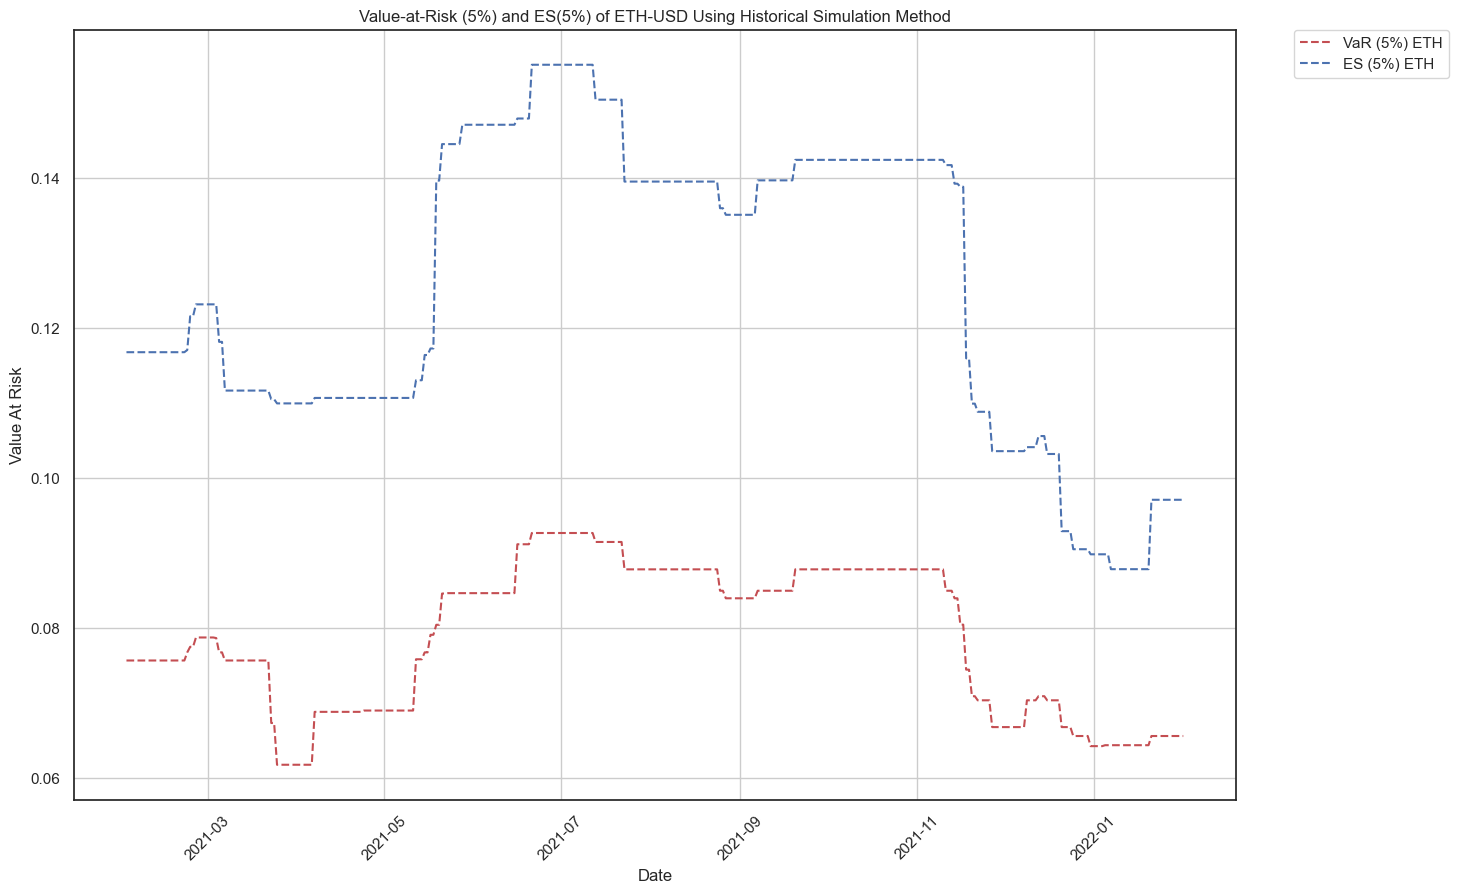

In [153]:
plt.figure(figsize=(15,10))
plt.plot(pd.to_datetime(prices['ETH-USD']['Date']), prices['ETH-USD']['VaR'], 'r--', label='VaR (5%) ETH')
plt.plot( pd.to_datetime(prices['ETH-USD']['Date']), prices['ETH-USD']['ES'], 'b--', label='ES (5%) ETH')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk (5%) and ES(5%) of ETH-USD Using Historical Simulation Method')
plt.show()


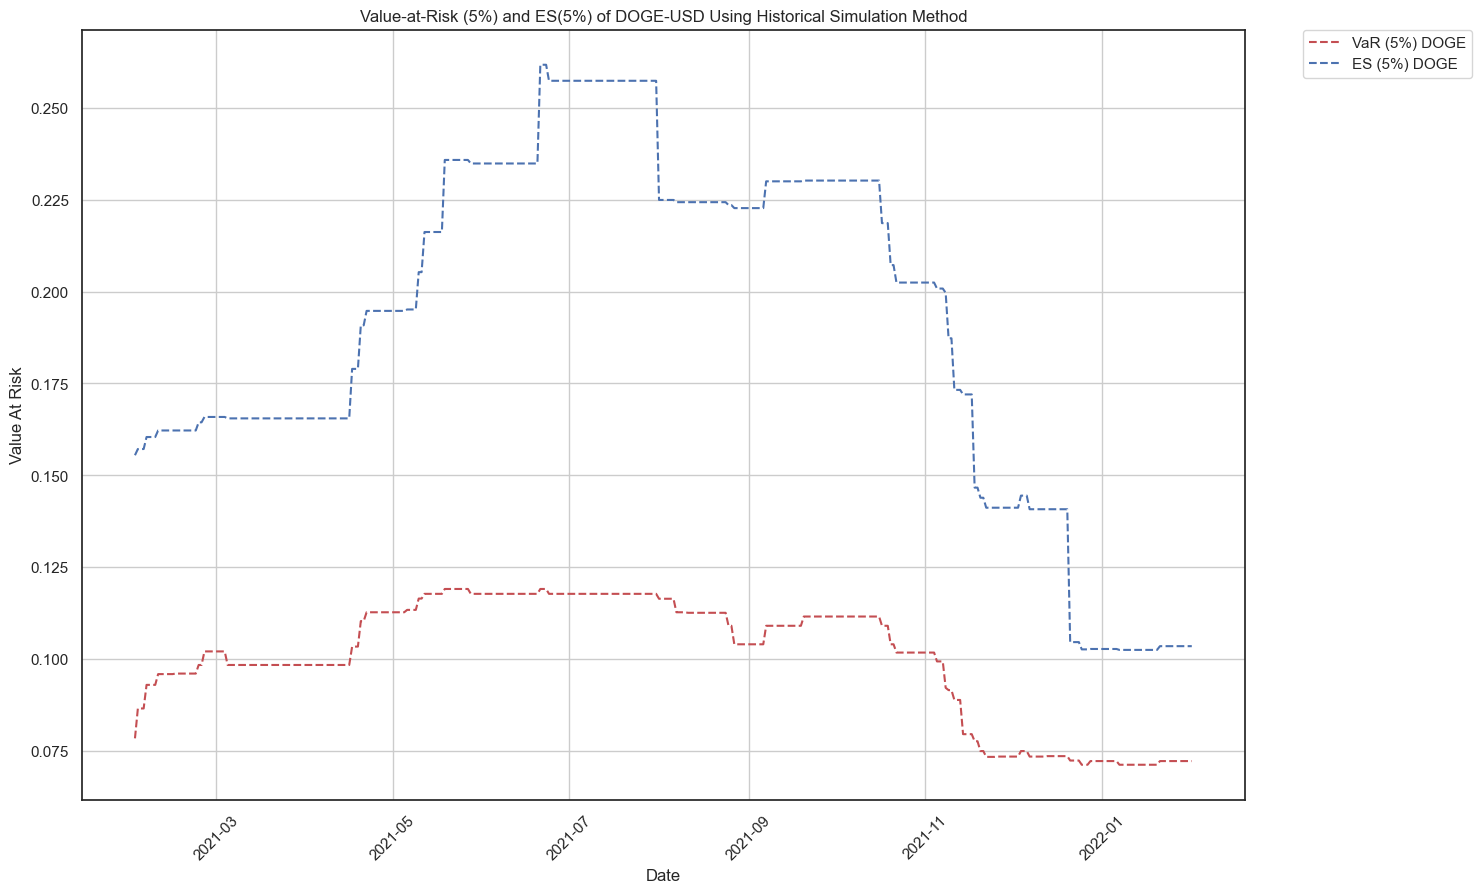

In [154]:
plt.figure(figsize=(15,10))
plt.plot(pd.to_datetime(prices['DOGE-USD']['Date']), prices['DOGE-USD']['VaR'], 'r--', label='VaR (5%) DOGE')
plt.plot( pd.to_datetime(prices['DOGE-USD']['Date']), prices['DOGE-USD']['ES'], 'b--', label='ES (5%) DOGE')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk (5%) and ES(5%) of DOGE-USD Using Historical Simulation Method')
plt.show()

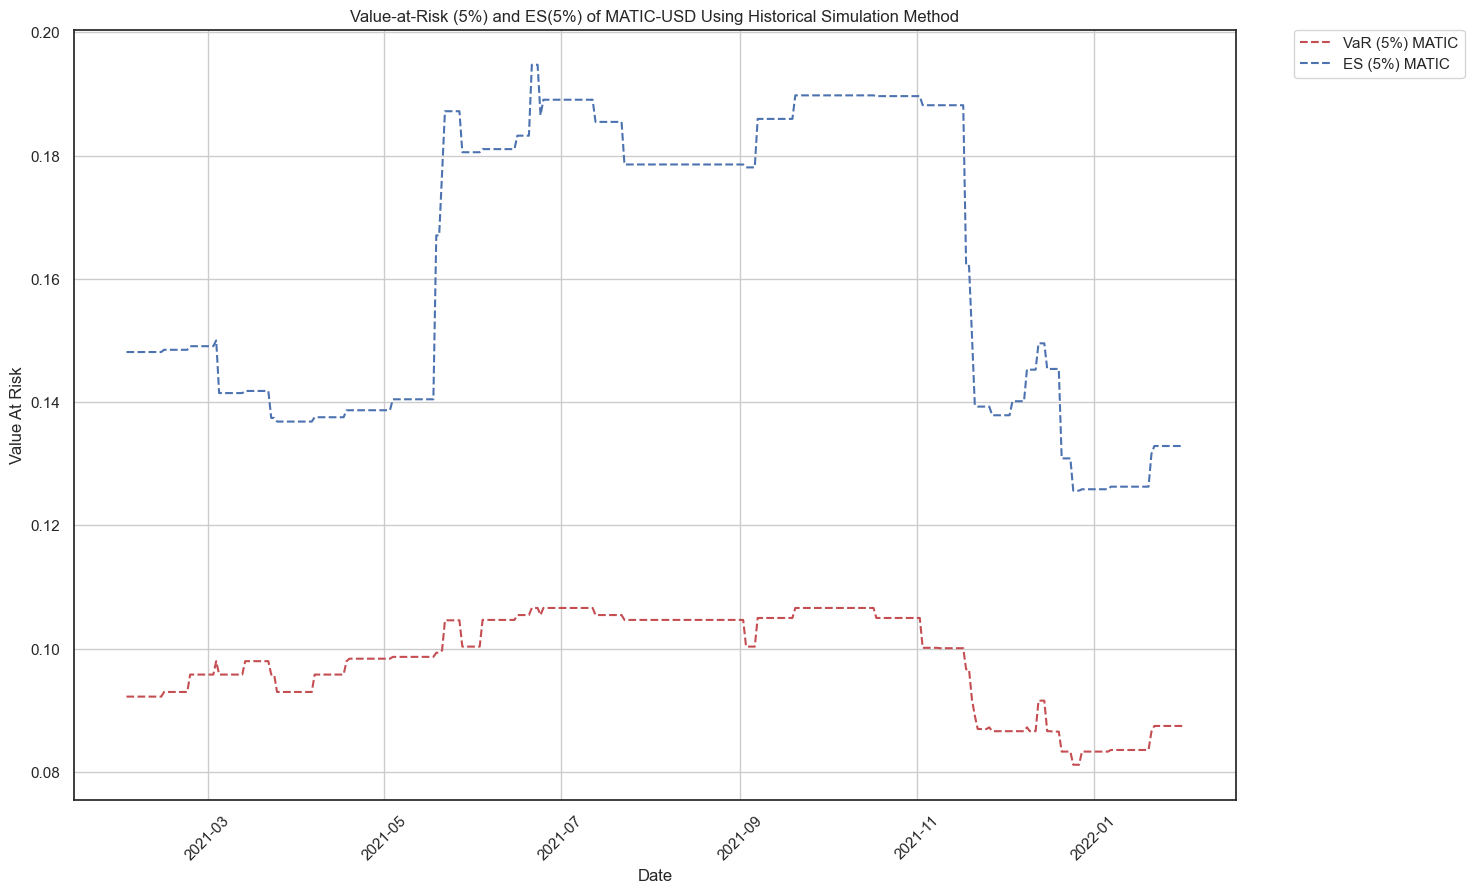

In [155]:
plt.figure(figsize=(15,10))
plt.plot(pd.to_datetime(prices['MATIC-USD']['Date']), prices['MATIC-USD']['VaR'], 'r--', label='VaR (5%) MATIC')
plt.plot( pd.to_datetime(prices['MATIC-USD']['Date']), prices['MATIC-USD']['ES'], 'b--', label='ES (5%) MATIC')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk (5%) and ES(5%) of MATIC-USD Using Historical Simulation Method')
plt.show()

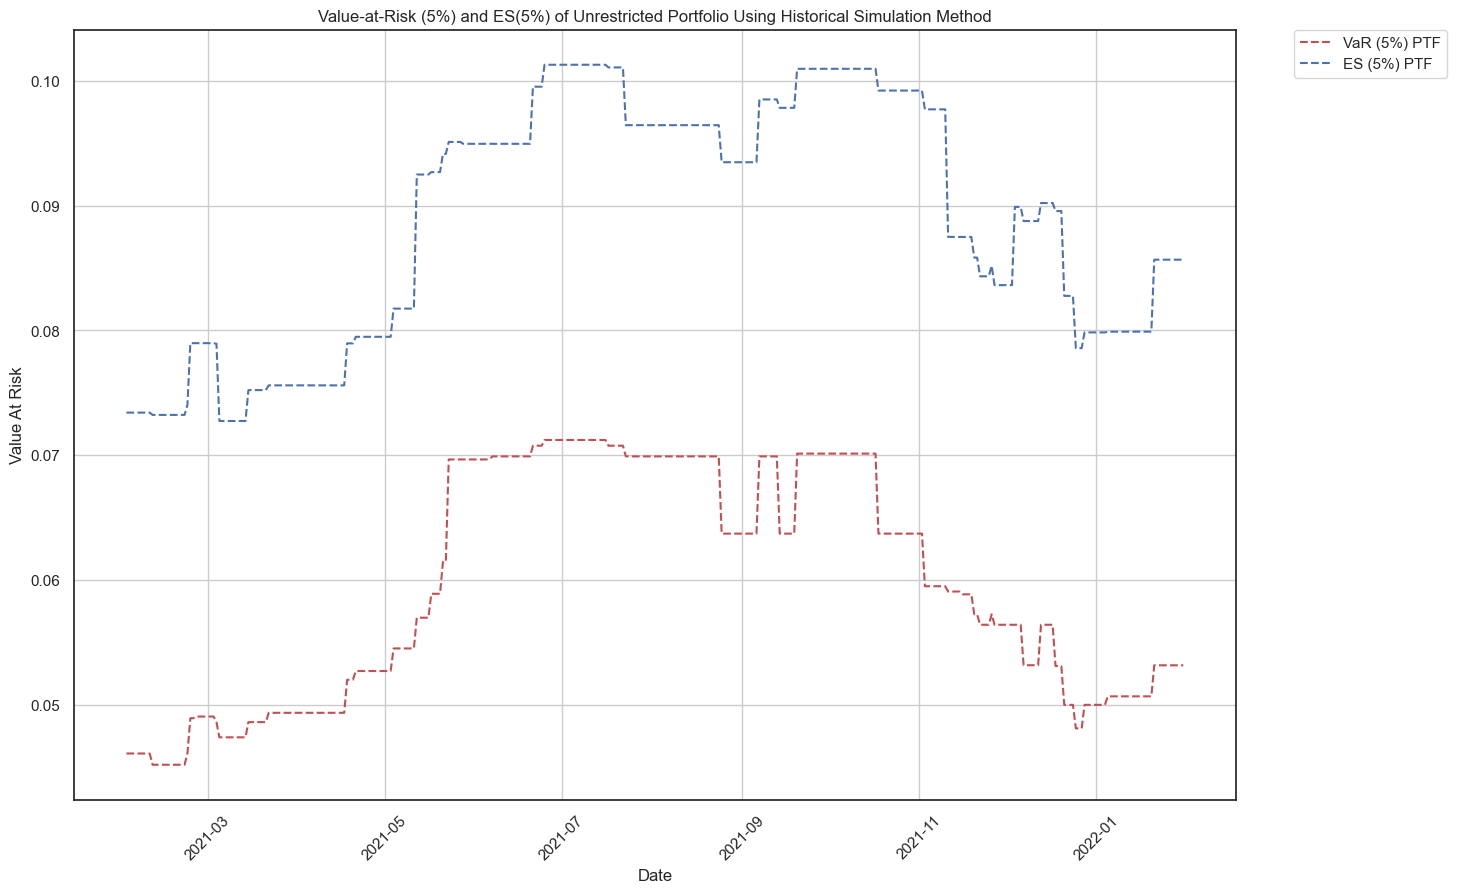

In [156]:
plt.figure(figsize=(15,10))
plt.plot(pd.to_datetime(prices['PTF']['Date']), prices['PTF']['VaR'], 'r--', label='VaR (5%) PTF')
plt.plot( pd.to_datetime(prices['PTF']['Date']), prices['PTF']['ES'], 'b--', label='ES (5%) PTF')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Value At Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('Value-at-Risk (5%) and ES(5%) of Unrestricted Portfolio Using Historical Simulation Method')
plt.show()

## Question 3(b)

The most risky component from the graphs above is DOGE-USD due to its high proportion of VaR and ES as seen in the graph. MATIC comes close at second by having an ES and VaR rating of more than 0.15 for the year 2021 to 2022, but DOGE still has the highest risk by averaging more than 0.15 but peaking at 0.22, the highest among the other assets